# ***Presentación***

## **Tecnicatura Universitaria en Inteligencia Artificial**

### Trabajo Práctico - Minería de Datos

#### Support Vector Machines y Random Forest

---

**Equipo**:
- Revello Simon
- Giampaoli Fabio

**Fecha**: 3/12/2023

---

## ***Objetivo***


El objetivo de este trabajo practico es integrar los conocimientos adquiridos en las unidades 5 y 6
en un problema real asociado a la determinación del color de los granos de café mediante la
medición atributos característicos.

# ***Entorno***

En este bloque se importaran los modulos y conjuntos de datos inciales que seran de utilidad para el desarrollo de funcionalidades especificas de los problemas.

## Librerias

In [3]:
# procesamiento
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

# visualizacion
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import widgets, interact
from mlxtend.plotting import plot_decision_regions
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Patch


# modelos
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn import svm
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier


## Dataset

Debe asegurarse de que la ruta a los archivos sea la correcta acorde a su entorno. En este caso cargamos ambos datasets al mismo tiempo en el entorno.

In [81]:
coffee = pd.read_csv('CoffeeRatings.csv', delimiter=';')

# ***Ejercicios***

## **Primer ejercicio**

---

Descargar el conjunto de CoffeeRatings.csv, para realizar el trabajo práctico. Analizar
los atributos del conjunto de datos (distribuciones, valores, outliers, tipos de datos, etc.)

---

### Separacion del conjunto

Se realiza una separacion de los datos para conjunto de entrenamiento y validacion en este punto para evitar la contaminacion de train-test a medida que se realizan transformaciones en dataset. Es decir, trataremos una parte del dataset como si realmente no la conocieramos de antemano.

In [5]:
def split_data(df, target_column='Color', test_size=0.2):
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    return X_train, X_test, y_train, y_test

# reserva del 20% par validacion
X_train, X_test, y_train, y_test = split_data(coffee)

In [6]:
print(X_train.shape, X_test.shape)

(668, 10) (167, 10)


### Informacion basica

Podemos notar muestras de los datos para entender la composicion de sus valores y tipos de datos.

In [7]:
pd.concat([X_train, y_train], axis=1).head()

,Scores_Aroma,Scores_Flavor,Scores_Aftertaste,Scores_Acidity,Scores_Body,Scores_Balance,Scores_Uniformity,Scores_Sweetness,Scores_Moisture,Scores_Total,Color
478,758,775,75,758,758,758,100,100,11,8317,Green
346,742,733,75,717,708,833,100,100,1,8233,Green
462,767,767,767,792,75,767,100,100,0,8375,Green
691,792,808,792,808,808,783,100,100,1,8592,Green
302,75,767,767,75,783,717,100,100,11,8333,Green


Notamos que son todas variables numericas discretas, a excepcion de la variable objetivo que es una categoria de tres clases.

In [8]:
pd.concat([X_train, y_train], axis=1).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 478 to 102
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Scores_Aroma       668 non-null    int64 
 1   Scores_Flavor      668 non-null    int64 
 2   Scores_Aftertaste  668 non-null    int64 
 3   Scores_Acidity     668 non-null    int64 
 4   Scores_Body        668 non-null    int64 
 5   Scores_Balance     668 non-null    int64 
 6   Scores_Uniformity  668 non-null    int64 
 7   Scores_Sweetness   668 non-null    int64 
 8   Scores_Moisture    668 non-null    int64 
 9   Scores_Total       668 non-null    int64 
 10  Color              668 non-null    object
dtypes: int64(10), object(1)
memory usage: 62.6+ KB


In [9]:
X_train.describe()

,Scores_Aroma,Scores_Flavor,Scores_Aftertaste,Scores_Acidity,Scores_Body,Scores_Balance,Scores_Uniformity,Scores_Sweetness,Scores_Moisture,Scores_Total
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,618.172156,614.574850,619.450599,608.829341,607.685629,609.315868,196.567365,160.368263,8.392216,6733.470060
std,277.282057,274.940858,257.672948,280.123272,278.486712,277.395502,263.035384,209.240962,5.051643,2963.004653
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,717.000000,708.000000,692.000000,708.000000,708.000000,692.000000,100.000000,100.000000,1.000000,7833.000000
50%,758.000000,742.000000,733.000000,742.000000,742.000000,742.000000,100.000000,100.000000,11.000000,8183.000000
75%,767.000000,767.000000,758.000000,767.000000,767.000000,767.000000,100.000000,100.000000,12.000000,8317.000000
max,867.000000,883.000000,867.000000,875.000000,842.000000,858.000000,933.000000,933.000000,17.000000,9058.000000


In [10]:
def graficar_datos_faltantes(df):
    df = df.copy()
    total = df.shape[0]
    nulos = df.isnull().sum() # obtiene todos los nulos

    df_grafico = pd.DataFrame({'total': total, 'nulos': nulos}) # genera un dataframe de forma temporal

    plt.figure(figsize=(10, 6))
    sns.barplot(y=df_grafico.index, x=df_grafico['total'], color='violet', alpha=0.5) # bar que muestra todos los registros
    bar_nulos = sns.barplot(y=df_grafico.index, x=df_grafico['nulos'], color='blue', alpha=0.5) # bar que muestra solo los nulos

    plt.xlabel('Cantidad de registros', fontsize=12)
    plt.ylabel('Variables', fontsize=12)
    plt.title('Cantidad de datos faltantes por variable', fontsize=16)

    # Agrega la cantidad de valores nulos a cada barra
    for i, v in enumerate(df_grafico['nulos']):
        bar_nulos.text(v + 0.2, i + .2, str(v), color='black', fontweight='bold')

    plt.show()

def graficar_elementos_unicos(df):
    n_unicos = df.nunique() # obtiene el numero de valores unicos de cada variable

    plt.figure(figsize=(10, 6))
    bar_unicos = sns.barplot(x=n_unicos.index, y=n_unicos.values, alpha=0.8) # grafico en barplot

    plt.ylabel('Cantidad de elementos únicos', fontsize=12)
    plt.xlabel('Variables', fontsize=12)
    plt.title('Cantidad de elementos únicos por variable', fontsize=16)
    plt.xticks(rotation='vertical')

    # Agrega la cantidad de elementos únicos a cada barra
    for i, v in enumerate(n_unicos):
        bar_unicos.text(i, v + 0.2, str(v), color='black', fontweight='bold', ha='center')

    plt.show()


Notemos  que el conjunto de datos viene completo. Es decir, no posee valores nulos en ninguna variable.

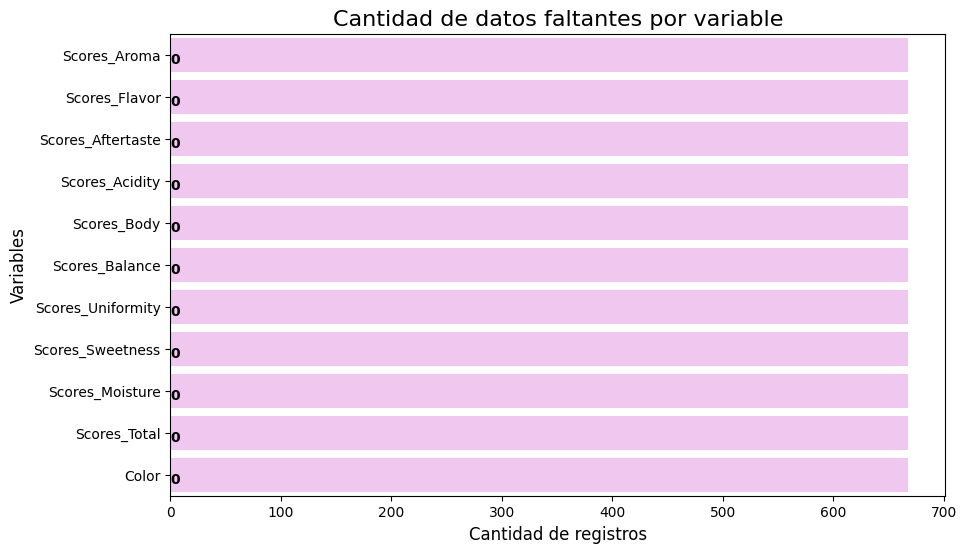

In [11]:
graficar_datos_faltantes(pd.concat([X_train, y_train], axis=1))

Tambien notemos las proporciones de elementos unicos de cada variable. Notar que la variable Score_total posee un rango de valores mucho mas amplio que el resto. Mietras que la vairable objetivo de Color solo tiene tres clases de tipo string.

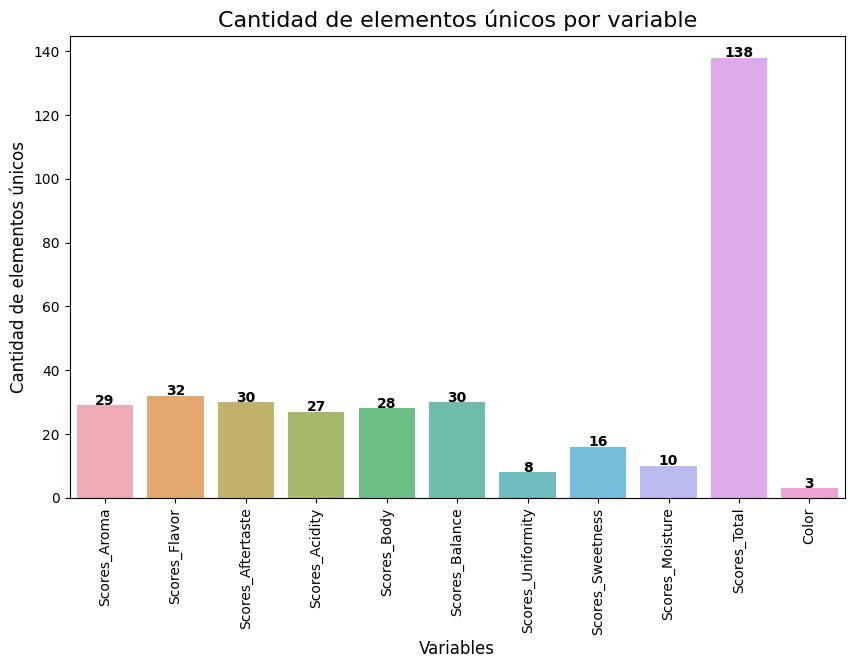

In [12]:
graficar_elementos_unicos(pd.concat([X_train, y_train], axis=1))

### Distribuciones por clase

El siguiente grafico es de utilidad para interpretar las distribuciones de las varibles numericas, separando por clases de la variable categorica.

In [13]:
def create_plots(X_train, y_train, explanatory_var, class_var, class_value):
    df = pd.concat([X_train, y_train], axis=1)
    if class_value != 'Todas':
        df = df[df[class_var] == class_value]

    fig, axs = plt.subplots(3, 1, figsize=(8,6))

    # scatter unidimensional
    sns.stripplot(x=explanatory_var, y=[""]*len(df), hue=class_var, data=df, jitter=True, ax=axs[0])
    axs[0].set_title('Distribución de ' + explanatory_var + ' con respecto a ' + class_var)
    axs[0].legend('')
    axs[0].set_xlabel("")

    # caja de metricas de distribucion
    sns.boxplot(y=class_var, x=explanatory_var, data=df, orient='h', ax=axs[1])
    axs[1].legend('')
    axs[1].set_xlabel("")

    # densidad de datos
    sns.kdeplot(data=df, x=explanatory_var, hue=class_var, fill=True, ax=axs[2])
    axs[2].set_xlabel(explanatory_var)
    axs[2].legend('')

    plt.tight_layout()
    plt.show()

# menu de seleccion de variable
explanatory_var_widget = widgets.Dropdown(
    options=[col for col in X_train.columns],
    description='Explicativa:',
)

# menu de seleccion de estado
class_value_widget = widgets.Dropdown(
    options=['Todas'] + list(y_train.unique()),
    description='Color:',
)

interact(create_plots, X_train=widgets.fixed(X_train), y_train=widgets.fixed(y_train), explanatory_var=explanatory_var_widget, class_var=widgets.fixed('Color'), class_value=class_value_widget)


interactive(children=(Dropdown(description='Explicativa:', options=('Scores_Aroma', 'Scores_Flavor', 'Scores_A…

<function __main__.create_plots(X_train, y_train, explanatory_var, class_var, class_value)>

Notar que en general poseemos distribuciones asimetricas, con presencia de valores atipicos en las tres clases en cada variable. Ademas generalemente las clases tienen distribuciones similares, salvo excepciones de variables como body, donde notamos que la clase de color Blue-Green tiene puntajes mas pequeños que las restantes.

### Distribuciones por variable

Notemos ahora distribuciones de las variables considerando la totalidad de los datos para entender globalmente sus comportamientos.

In [14]:
def create_dist(X_train, y_train, variable):
    df = pd.concat([X_train, y_train], axis=1)
    df = df.dropna(subset=[variable])

    # Crear un diccionario de colores únicos para cada variable
    color_dict = {col: color for col, color in zip(df.columns, sns.color_palette("hsv", len(df.columns)))}

    fig, ax = plt.subplots(figsize=(10, 4))

    # Violin plot (nubes)
    vp = ax.violinplot(df[variable], positions=[0.8], vert=False,
                       showmeans=False, showextrema=False, showmedians=False)
    vp['bodies'][0].get_paths()[0].vertices[:, 1] = np.clip(vp['bodies'][0].get_paths()[0].vertices[:, 1], 0.8, 1.2)
    vp['bodies'][0].set_color(color_dict[variable])
    vp['bodies'][0].set_alpha(0.5)

    # Scatter plot (lluvia)
    y = np.full(len(df[variable]), 0.70) + np.random.uniform(low=-.1, high=.1, size=len(df[variable]))
    ax.scatter(df[variable], y, s=8, color=color_dict[variable], alpha=0.2)

     # Boxplot
    bp = ax.boxplot(df[variable], patch_artist=True, vert=False,
                    positions=[0.8],  # Posición del boxplot en el eje vertical
                    boxprops=dict(linewidth=0.2, color='black', alpha=0.5),
                    whiskerprops=dict(linewidth=0.2, color='black', alpha=0.5),
                    flierprops=dict(markerfacecolor='white', markeredgecolor='black', marker='o', markersize=4, alpha=0.1))
    bp['boxes'][0].set_facecolor(color_dict[variable])
    bp['boxes'][0].set_alpha(0.2)

    # Configurar títulos y etiquetas
    ax.set_title(variable)
    ax.set_yticks([])
    ax.set_xlabel("Value")

    plt.show()

# Crear selector de variable
variable_widget = widgets.Dropdown(
    options=[col for col in X_train],
    description='Variable:',
)

# Usar interact para crear la actualizar el grafico en un cambio
interact(create_dist, X_train=widgets.fixed(X_train), y_train=widgets.fixed(y_train), variable=variable_widget)


interactive(children=(Dropdown(description='Variable:', options=('Scores_Aroma', 'Scores_Flavor', 'Scores_Afte…

<function __main__.create_dist(X_train, y_train, variable)>

Notamos las mismas circunstancias que los graficos previos debido a las distirbuciones por clases no son tan diferentes las unas de las otras.

### Correlaciones

Podemos entender en una matriz de correlaciones como se relacionan y afectan las variables entre si.

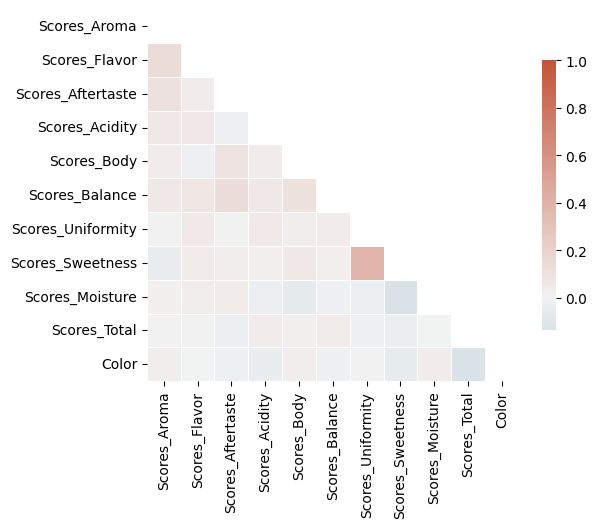

In [15]:
def grafico_correlacion(X_train, y_train, columnas):
    df_copy = pd.concat([X_train, y_train], axis=1)  # Hacer una copia del dataframe

    for columna in columnas:
        # Hacer un encoding de frecuencia para la variable categórica
        encoding = df_copy.groupby(columna).size()
        encoding = encoding / len(df_copy)
        df_copy[columna] = df_copy[columna].map(encoding)

    # Calcular la matriz de correlación
    corr = df_copy.corr()

    # Crear una máscara para el triángulo superior para no mostrar repetidos
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Generar un mapa de colores divergentes personalizado
    fig, ax = plt.subplots(figsize=(6, 7))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Dibujar el mapa de calor con la máscara y la relación de aspecto correcta
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

    # Mostrar el gráfico
    plt.grid(False)
    plt.show()

grafico_correlacion(X_train, y_train, ['Color']) # state es la unica categorica aqui

Podemos ver que los valores son muy bajos en general. Podemos sugerir que casi parecen variables independientes entre asi, al menos considerando relaciones lineales solamente.

### Modelo base de clasificacion

La intecion de crear un model obase de clasificacion es tomar un punto de partida para conocer las estimaciones que realiza para la varible categorica. De este modelo base podemos obtener las metricas de validacion para entender su rendimiento ante el set de datos dado, y usar estas metricas como base para validar su mejora o no a lo largo de las transformaciones o cambios en el dataset o parametros.

In [16]:
def train_and_evaluate(clf, X_train, X_test, y_train, y_test):
    # Entrena el modelo SVM
    clf.fit(X_train, y_train)

    # Realiza las predicciones
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    print(classification_report(y_test, y_test_pred, zero_division=0))
    return clf

In [17]:
base_model = svm.SVC()
train_and_evaluate(base_model, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

  Blue-Green       0.00      0.00      0.00        12
Bluish-Green       0.00      0.00      0.00        20
       Green       0.81      1.00      0.89       135

    accuracy                           0.81       167
   macro avg       0.27      0.33      0.30       167
weighted avg       0.65      0.81      0.72       167



SVC()

Notamos metricas que demuestran sobreajuste del modelo en los datos de entrenamiento, aunque muy leve. Ademas notamos que solo una de las clases posee metricas de F1 Score, las restantes son nulas. Esto implica que el dataset esta desbalanceado para esta clase.

### Valores Atipicos

Contamos con presencencia de valores atipicos de forma sistematica en todas las variables numericas. Un enfoque simple podria ser simplemente eliminarlos, de forma que solo nos quedamos con los rangos de valores mayoritarios.

In [18]:
def remove_outliers(X_train, X_test, y_train, y_test):
    Q1 = X_train.quantile(0.25)
    Q3 = X_train.quantile(0.75)
    IQR = Q3 - Q1

    # Solo mantener las filas en el conjunto de entrenamiento que están dentro del rango intercuartil
    train_mask = ((X_train >= (Q1 - 1.5 * IQR)) & (X_train <= (Q3 + 1.5 * IQR))).all(axis=1)
    X_train = X_train[train_mask]
    y_train = y_train[train_mask]

    # Solo mantener las filas en el conjunto de prueba que están dentro del rango intercuartil
    test_mask = ((X_test >= (Q1 - 1.5 * IQR)) & (X_test <= (Q3 + 1.5 * IQR))).all(axis=1)
    X_test = X_test[test_mask]
    y_test = y_test[test_mask]

    return X_train, X_test, y_train, y_test

# Uso de la función
X_train_out, X_test_out, y_train_out, y_test_out = remove_outliers(X_train, X_test, y_train, y_test)

In [19]:
# Crear selector de variable
variable_widget = widgets.Dropdown(
    options=[col for col in X_train_out],
    description='Variable:',
)

# Usar interact para crear la actualizar el grafico en un cambio
interact(create_dist, X_train=widgets.fixed(X_train_out), y_train=widgets.fixed(y_train_out), variable=variable_widget)


interactive(children=(Dropdown(description='Variable:', options=('Scores_Aroma', 'Scores_Flavor', 'Scores_Afte…

<function __main__.create_dist(X_train, y_train, variable)>

Notemos ahora como las distribuciones han cambiado y han pasado a ser mas simetricas, pero a coste de perder gran cantidad de datos reales.

In [20]:
model_out = svm.SVC(probability=True)
train_and_evaluate(model_out, X_train_out, X_test_out, y_train_out, y_test_out)

              precision    recall  f1-score   support

  Blue-Green       0.00      0.00      0.00         3
Bluish-Green       0.00      0.00      0.00         6
       Green       0.73      1.00      0.84        24

    accuracy                           0.73        33
   macro avg       0.24      0.33      0.28        33
weighted avg       0.53      0.73      0.61        33



SVC(probability=True)

La perdida de datos para entrenamiento en realidad afecta negativamente al modelo. Por lo que descartamos tratarlos con cualquier enfoque, y buscaremos reducir su importancia a la hora de clasificar mediante parametrizacion de los algoritmos en si mismos.

### Balanceo de clases

El siguiente grafico demuestra las proporciones de registros de cada clase.

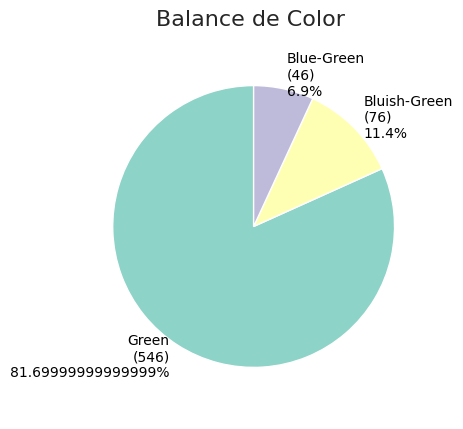

In [21]:
def graficar_proporcion_datos(df, column):
    value_counts = column.value_counts() # cantidad de valores de cada clase

    sns.set(style="whitegrid")
    fig, ax = plt.subplots(figsize=(4, 5))

    # controlar si la categoria es parte del dataframe, o una Serie aparte
    if isinstance(column, pd.Series):
        wedges, texts, autotexts = ax.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, pctdistance=0.5, colors=sns.color_palette('Set3'))
        plt.title(f'Balance de {column.name} ', fontsize=16)
    else:
        wedges, texts, autotexts = ax.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, pctdistance=0.5, colors=sns.color_palette('Set3'))
        plt.title(f'Balance de {column} ', fontsize=16)

    plt.axis('equal')

    # Añadir la cantidad de registros en cada clase
    for text, autotext, label in zip(texts, autotexts, value_counts.index):
        text.set_text(f'{label}\n({value_counts[label]})\n{round(value_counts[label]/df.shape[0], 3)*100}%')
        text.set_fontsize(10)
        text.set_color('black')

        autotext.set_text('')
        autotext.set_fontsize(8)
        autotext.set_color('white')

    plt.show()

graficar_proporcion_datos(X_train, y_train)

Usaremos dos transformaciones para el balanceo de las clases. Primero usaremos undersampling para reducir la proporcion de la clase mayoritaria, eliminado registros de forma aleatoria de la clase Green.

shape original: 668
shape balanceado: 272


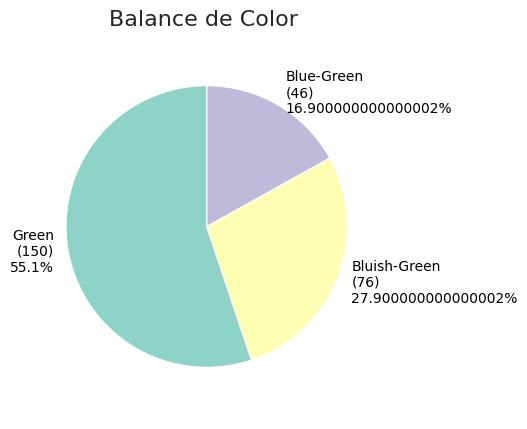

In [22]:
def under_sample_classes(X, y):
    # Crear el objeto RandomUnderSampler
    rus = RandomUnderSampler(sampling_strategy={'Green': 150}, random_state=42)
    X_res, y_res = rus.fit_resample(X, y)

    print(f'shape balanceado: {X_res.shape[0]}')

    # Devolver el DataFrame balanceado
    return X_res, y_res

# Llamada a la función
print(f'shape original: {X_train.shape[0]}')
X_train_under, y_train_under = under_sample_classes(X_train, y_train)
graficar_proporcion_datos(X_train_under, y_train_under)

Si bien no se ha balanceado del todo, es de utilidad ya que el siguiente paso sera hacer oversmaping en las otras dos clases, de modo de no generar un a gran de cantidad de registros sintenticos como si no hubiesemos reducido a Green primero.

shape original: 272
shape balanceado: 420


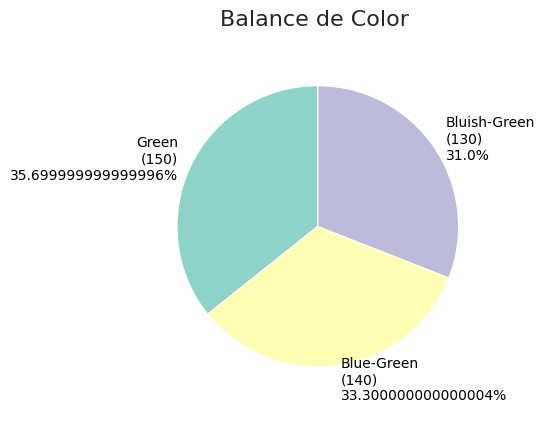

In [23]:
def over_classes(X, y):
    # Crear el objeto SMOTE
    smote = SMOTE(sampling_strategy={'Green': 150, 'Blue-Green': 140, 'Bluish-Green': 130}, random_state=42)
    X_res, y_res = smote.fit_resample(X, y)

    print(f'shape balanceado: {X_res.shape[0]}')

    # Devolver el DataFrame balanceado
    return X_res, y_res

# Llamada a la función
print(f'shape original: {X_train_under.shape[0]}')
X_train_over, y_train_over = over_classes(X_train_under, y_train_under)
graficar_proporcion_datos(X_train_over, y_train_over)

In [24]:
model_over = svm.SVC()
train_and_evaluate(model_over, X_train_over, X_test_out, y_train_over, y_test_out)

              precision    recall  f1-score   support

  Blue-Green       0.09      1.00      0.17         3
Bluish-Green       0.00      0.00      0.00         6
       Green       0.00      0.00      0.00        24

    accuracy                           0.09        33
   macro avg       0.03      0.33      0.06        33
weighted avg       0.01      0.09      0.02        33



SVC()

Descartaremos este enfoque de transformar el dataset directamente debido a que las metricas de calsificacion empeoran mucho, y en cambio, le diremos a los modelos de soporte vectorial directamente por parametro que balancee los pesos de las clases, de modo que le de mas importancia a las clases minoritarias a la hora de aprender a clasificar.

### Escalado de datos

Notamos que los rangos de valores de cada variable difiere en algunos casos muy poco, y en otros difieren bastante. Por lo que se propone escalar los valores para llevar todas las variables al mismo rango de valores.

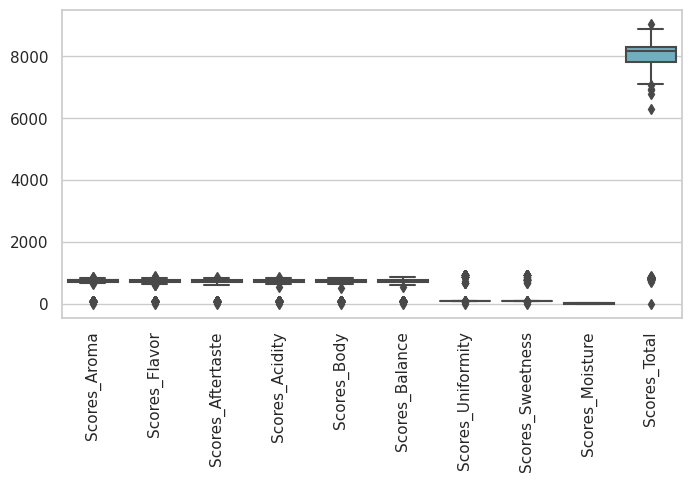

In [25]:
def show_distrbutions(df):
    plt.figure(figsize=(8, 4))
    sns.boxplot(df)
    plt.xticks(rotation=90)
    plt.show()

show_distrbutions(X_train)

In [26]:
def estandarize(X_train, scale_type, scaler_trained=None):
  data = X_train.copy()

  scalers = {'Standard': StandardScaler(),
               'MinMax': MinMaxScaler(),
               'Robust': RobustScaler()}
  if scaler_trained is None:
    scaler = scalers[scale_type]
  else:
    scaler = scaler_trained

  data_scaled = scaler.fit_transform(data)
  data_standardized = pd.DataFrame(data_scaled, columns=data.columns)

  if scaler_trained is None:
    return data_standardized, scaler
  else:
    return data_standardized

# Function to perform the selected standardization method
def perform_standardization(method):

    df_scaled, scaler = estandarize(X_train, method, None)
    show_distrbutions(df_scaled)

# Dropdown widget for selecting the standardization method
standardization_dropdown = widgets.Dropdown(
    options=['Standard', 'MinMax', 'Robust'],
    value='Standard',
    description='Method:',
    disabled=False,
)

# Define an interactive output widget
output = widgets.interactive_output(perform_standardization, {'method': standardization_dropdown})

# Display the widgets
display(standardization_dropdown, output)


Dropdown(description='Method:', options=('Standard', 'MinMax', 'Robust'), value='Standard')

Output()

In [27]:
X_train_standar, scaler_standar = estandarize(X_train, 'Standard', None)
X_test_standar = estandarize(X_test, 'Standard', scaler_standar)

Nos quedaremos con el escalador estandar por simplicidad de interpretacion y comparacion entre variables.

### Reduccion de dimensionalidad

Inicialmente se busca visualizar la distribucion de todo el conjunto de datos en un espacio de dimencionalidad reducida, distiguiendo cada clase con un color diferente.

columnas de coffee: 10


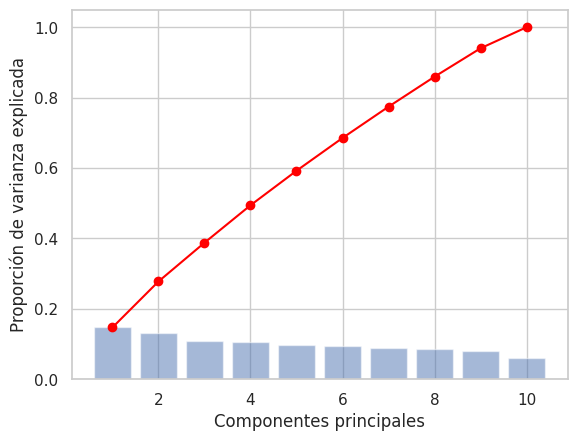

In [28]:
#--- Obtencion de los componentes ---#
pca = PCA()

X_train_pca_result = pca.fit_transform(X_train_standar)
X_test_pca_result = pca.transform(X_test_standar)

X_train_pca = pd.DataFrame(data=X_train_pca_result, columns=[f"PC{i+1}" for i, _ in enumerate(X_train_standar.columns)]) # genera un df de las componentes
X_test_pca = pd.DataFrame(data=X_test_pca_result, columns=[f"PC{i+1}" for i, _ in enumerate(X_test_standar.columns)]) # genera un df de las componentes

#--- Explicabilidad de los componentes ---#

varianza = np.cumsum(pca.explained_variance_ratio_)

acum = pd.DataFrame({"Component": X_train_pca.columns,
                     "EigenValues": pca.explained_variance_,
                     "PropVar": pca.explained_variance_ratio_,
                     "VarAcum": varianza}) # aca interesa la varianza acumulada, que se asemeja al porcentaje de explicabilidad de los datos


print(f'columnas de coffee: {X_train_standar.shape[1]}')

#--- grafico de explicabilidad ---#

plt.bar(range(1, 11), pca.explained_variance_ratio_, alpha=0.5, align="center")
plt.plot(range(1, 11), varianza, marker="o" ,color="red")
plt.ylabel("Proporción de varianza explicada")
plt.xlabel("Componentes principales")
plt.show()


Podemos notar que todos los componentes poseen proporciones de explicabilidad muy similares. Es puede significar que todas las variables sirven de alguna manera para explicar cada una un poco los datos del conjunto.

Aun asi utilizamos tres variables para simplificar la visualizacion de los datos en el espacio.

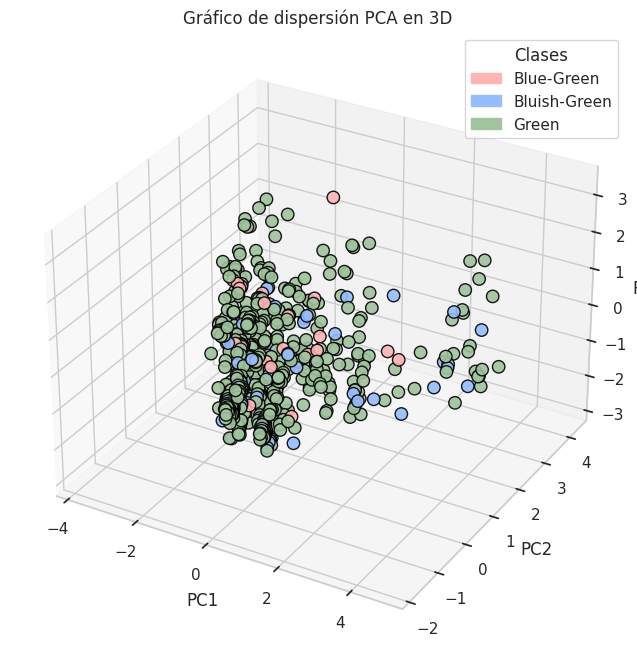

In [29]:
# Mapeo de colores para las clases
class_color_mapping = {
    'Blue-Green': '#FFB4B4',
    'Bluish-Green': '#95BDFF',
    'Green': '#A0C49D'
}

# Convertir las etiquetas de clases a colores utilizando el mapeo
colors = y_train.map(class_color_mapping)

# Crear el gráfico de dispersión 3D con colores asignados a cada clase
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_train_pca['PC1'], X_train_pca['PC2'], X_train_pca['PC3'], c=colors, s=80, alpha=0.9, edgecolors='black')

# Agregar etiquetas y título
ax.set_title('Gráfico de dispersión PCA en 3D')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Crear manualmente las etiquetas de la leyenda
legend_labels = list(class_color_mapping.keys())
legend_elements = [Patch(color=class_color_mapping[label], label=label) for label in legend_labels]

# Agregar leyenda
ax.legend(handles=legend_elements, title='Clases')

# Mostrar el gráfico
plt.show()


Notamos que no hay una clara separacion entre los grupos en la distribucion de los datos, al menos en este espacio de dimencionalidad reducido.

Esto suguiere que algoritmos de clasificacion pueden resultar ineficientes para separar las clases, incluso con modelos no lineales.

## **Segundo ejercicio**

---

Realizar la predicción del atributo Color utilizando máquinas de vectores con kernel lineal
analizando el parámetro costo. Mostar los resultados sobre los conjuntos de test
(Precisión, Exhaustividad y Exactitud) utilizando validación cruzada con k =5

---

### Hiperarametricacion de C

Podemos explorar iterando con distintos valores para el parametro C, buscando aquel que maximize los resultados para metricas de testing.

Notar que se usa modelo de maquinas de soporte vectorial con kernel lineal y le decimos por parametro que balancee las clases. Esto logra asigarle peso o importancia a cada clase de acuerdo a su proporcion de aparicion en el dataset, al mismo tiempo que reducimos la presencia de valores atipicos mediante el parametro de costo.

In [30]:
grid = GridSearchCV(
    estimator=svm.SVC(kernel="linear", random_state=42, class_weight='balanced'),
    param_grid={"C": [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1]},
    scoring="accuracy",
    n_jobs=3,
    verbose=1,
    cv=5,
    return_train_score=True
)

grid.fit(X_train_standar, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5,
             estimator=SVC(class_weight='balanced', kernel='linear',
                           random_state=42),
             n_jobs=3,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 0.5, 1]},
             return_train_score=True, scoring='accuracy', verbose=1)

Este grafico inidica que el menor error ocurre cuando el parametro de costo es de 0.0001, por lo que sera nuestro valor elejido.

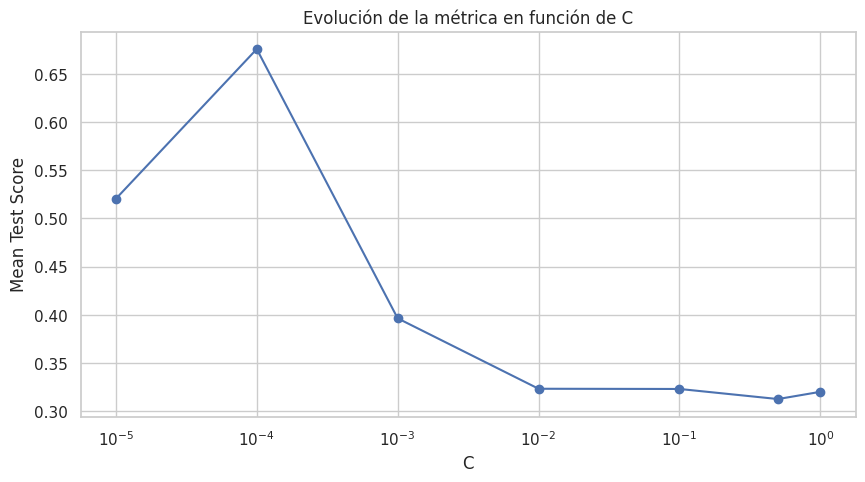

In [31]:
results = pd.DataFrame(grid.cv_results_)

# Filtra los resultados para obtener solo la información relevante
param_C_values = results['param_C'].astype(float)
mean_test_scores = results['mean_test_score']

# Crea el gráfico
plt.figure(figsize=(10, 5))

# Gráfico para el parámetro C
plt.plot(param_C_values, mean_test_scores, marker='o')
plt.xscale('log')  # Escala logarítmica para C
plt.xlabel('C')
plt.ylabel('Mean Test Score')
plt.title('Evolución de la métrica en función de C')

# Muestra el gráfico
plt.show()


In [32]:
grid.best_estimator_.C

0.0001

Notar como valores mas bajos o altos que este para C, implican valores de testing mas bajos.

### Definicion de modelo

Como ya encontramos el parametro que minimiza el error asignadole costos a las clases, podemos contruir un modelo formal con este enfoque de kernel lineal con el parametro c adecuado, y balancenado dentro del algoritmo los pesos que se les asigna a cada clase.

              precision    recall  f1-score   support

  Blue-Green       0.00      0.00      0.00        12
Bluish-Green       0.00      0.00      0.00        20
       Green       0.81      1.00      0.89       135

    accuracy                           0.81       167
   macro avg       0.27      0.33      0.30       167
weighted avg       0.65      0.81      0.72       167



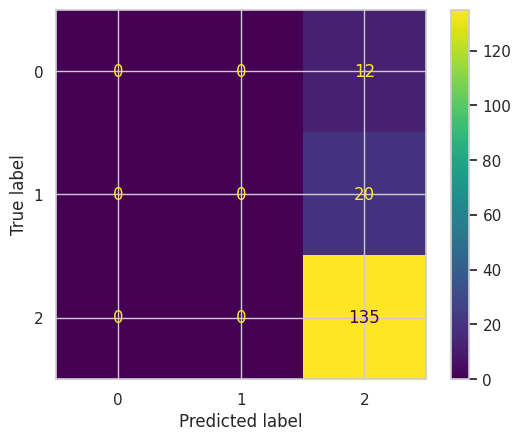

In [33]:
# modelo formal, entrenamiento y prediccion
modelo_lineal = svm.SVC(C=0.0001, kernel="linear", random_state=42, class_weight='balanced')
modelo_lineal.fit(X_train_standar, y_train)
pred = modelo_lineal.predict(X_test_standar)

# metricas
print(classification_report(y_test, pred, zero_division=0))
ConfusionMatrixDisplay(confusion_matrix(y_test, pred)).plot()

Notamos que las metricas no han variado practicamente en nada en comparacion con el modelo base con parametros default. Esto puede sugerir que el dataset requiere de mas complejidad para realizar separaciones mas adecuadas de las clases que modelos lineales.

Podemos observar en la matriz de confusion que el modelo solo predice bien para la clases Green, y que clases que no eran Grenn, han sido clasificadas erroneamente.

### Validacion cruzada

Podemos obtener como las metricas se comportan con las distintas combinaciones de conjuntos para train y testing, y obtener metricas que agrupan a las mismas.

In [34]:
# Separamos las características y la variable objetivo
X = pd.concat([X_train_standar, X_test_standar], axis=0)
y = pd.concat([y_train, y_test], axis=0)

# Creamos el modelo SVM
modelo_lineal_final = svm.SVC(C=0.0001, kernel="linear", random_state=42, class_weight='balanced')

# Creamos el objeto de validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Listas para almacenar los resultados de cada iteración
precisiones = []
exhaustividades = []
exactitudes = []

# Bucle para realizar la validación cruzada
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Entrenamos el modelo
    modelo_lineal_final.fit(X_train, y_train)

    # Realizamos las predicciones
    y_pred = modelo_lineal_final.predict(X_test)

    # Calculamos las métricas y las añadimos a las listas
    precisiones.append(precision_score(y_test, y_pred, average='macro', zero_division=0))
    exhaustividades.append(recall_score(y_test, y_pred, average='macro', zero_division=0))
    exactitudes.append(accuracy_score(y_test, y_pred))

# Calculamos la media de las métricas
precision_media = round(np.mean(precisiones), 4)
exhaustividad_media = round(np.mean(exhaustividades), 4)
exactitud_media = round(np.mean(exactitudes), 4)

print(f'Precisión media: {precision_media}')
print(f'Exhaustividad media: {exhaustividad_media}')
print(f'Exactitud media: {exactitud_media}')


Precisión media: 0.1812
Exhaustividad media: 0.3333
Exactitud media: 0.5437


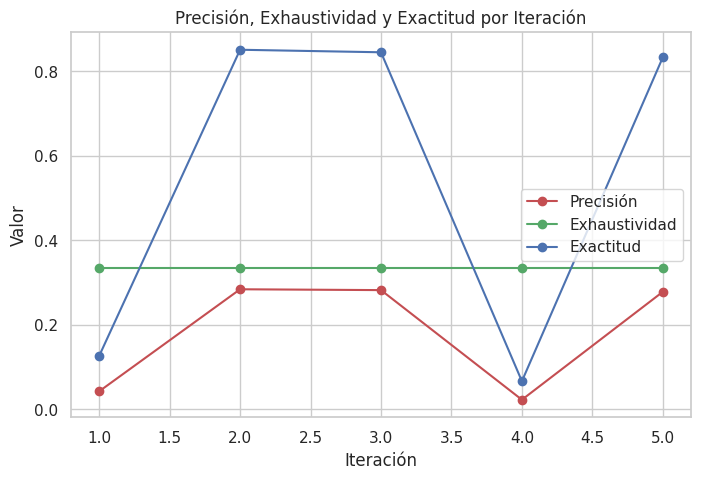

In [35]:
# Creamos el eje x para el gráfico
eje_x = range(1, len(precisiones) + 1)

plt.figure(figsize=(8, 5))

# Graficamos las precisiones
plt.plot(eje_x, precisiones, marker='o', linestyle='-', color='r', label='Precisión')

# Graficamos las exhaustividades
plt.plot(eje_x, exhaustividades, marker='o', linestyle='-', color='g', label='Exhaustividad')

# Graficamos las exactitudes
plt.plot(eje_x, exactitudes, marker='o', linestyle='-', color='b', label='Exactitud')

plt.xlabel('Iteración')
plt.ylabel('Valor')
plt.title('Precisión, Exhaustividad y Exactitud por Iteración')
plt.legend()

plt.show()

Notemos que hay conjuntos que resultan muy desfavorables para el entramiento y otros que tiene mejores metricas. Esto explica por que las metricas son bajas en general, y por que las generales (los promedios de los cinco entrenamientos) son mas bajas que en un conjunto especifico al que le ha ido bien.

### Visualizacion de clasificacion

El siguiente grafico puede ser de utilidad para ver como el modelo de clasificacion divide en el espacio las clases clases.

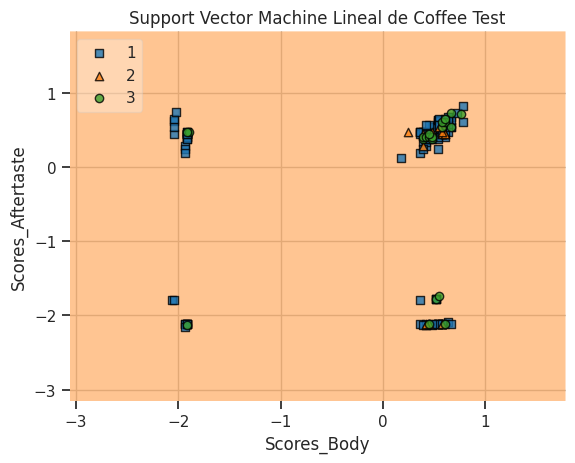

In [76]:
modelo_sub_lin = svm.SVC(C=0.0001, kernel="linear", random_state=42, class_weight='balanced')
X_test_subset = X_test[['Scores_Body', 'Scores_Aftertaste']]

# convercion a arrays numericos
class_mapping = {'Green': 1, 'Blue-Green': 2, 'Bluish-Green': 3}
y_test_encoded = y_test.map(class_mapping).values
X_test_subset_np = X_test_subset.values

# Ajusta el modelo con el subconjunto de datos
modelo_sub_lin.fit(X_test_subset_np, y_test_encoded)

# plor rediones de descion y valores
plot_decision_regions(X_test_subset_np, y_test_encoded, clf=modelo_sub_lin, legend=2)

plt.xlabel(X_test_subset.columns[0])
plt.ylabel(X_test_subset.columns[1])
plt.title('Support Vector Machine Lineal de Coffee Test')
plt.show()

Los datos son reales de testing solo para dos variables para facilidad de visualizacion, y los colores del fondo indican la clase a la que pertence ese espacio.

Notamos que no realiza un buen trabajo este algoritmo para la clasificacion, parece que clasifica a todos los valores como de una unica clase.

## **Tercer ejercicio**

---

Realizar la predicción del atributo Color utilizando máquinas de vectores con kernel
gaussiano analizando los parámetros costo y gama. Mostar los resultados sobre los
conjuntos de test (Precisión, Exhaustividad y Exactitud) utilizando validación cruzada con
k =5.

---

### Hiperparametrizacion

A continuacion se hacen pruebas de busqueda autamatica de los mejores parametros dentro de un dominio de valores dados para un algoritmo de support vector machine, pero esta vez utilizando un kernel no lineal Gaussiano.

In [37]:
grid_gauss = GridSearchCV(
    estimator = svm.SVC(kernel="rbf", random_state=42, class_weight='balanced'),
    param_grid={
        "C": [0.001, 0.01, 0.1, 1, 10, 50, 100, 200],
        "gamma": [1, 10, 100, 200, 500, 1000]
    },
    scoring="accuracy",
    n_jobs=3,
    verbose=1,
    cv=5,
    return_train_score=True
)

grid_gauss.fit(X_train_standar, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=SVC(class_weight='balanced', random_state=42),
             n_jobs=3,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 50, 100, 200],
                         'gamma': [1, 10, 100, 200, 500, 1000]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [38]:
print(f'Mejor valor de C: {grid_gauss.best_estimator_.C}')
print(f'Mejor valor de gamma: {grid_gauss.best_estimator_.gamma}')

Mejor valor de C: 1
Mejor valor de gamma: 500


Podemos visualizar en un grafico el hecho de como evolucionan los puntajes en el conjunto de test a medida que cambian los valores para los parametros.

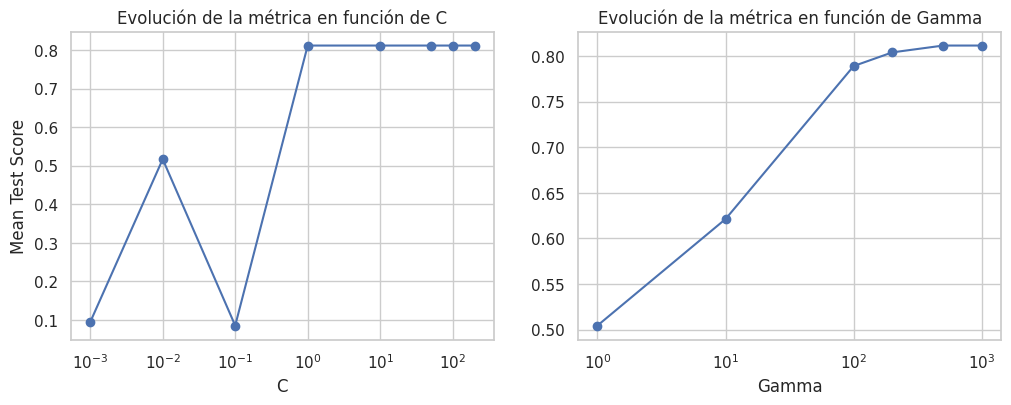

In [39]:
results = pd.DataFrame(grid_gauss.cv_results_)
results_C = results[results.param_gamma == 500]
results_gamma = results[results.param_C == 1]

# Filtra los resultados para obtener solo la información relevante
param_C_values = results_C['param_C'].astype(float)
mean_test_scores_C = results_C['mean_test_score']

# Filtra los resultados para obtener solo la información relevante
param_gamma_values = results_gamma['param_gamma'].astype(float)
mean_test_scores_gamma = results_gamma['mean_test_score']

# Crea el gráfico
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Gráfico para el parámetro C
axes[0].plot(param_C_values, mean_test_scores_C, marker='o')
axes[0].set_xscale('log')  # Escala logarítmica para C
axes[0].set_xlabel('C')
axes[0].set_ylabel('Mean Test Score')
axes[0].set_title('Evolución de la métrica en función de C')

# Gráfico para el parámetro gamma
axes[1].plot(param_gamma_values, mean_test_scores_gamma, marker='o')
axes[1].set_xscale('log')  # Escala logarítmica para gamma
axes[1].set_xlabel('Gamma')
axes[1].set_title('Evolución de la métrica en función de Gamma')

# Muestra el gráfico
plt.show()

Notamos como en ambos casos los parametros se estabilizan en cierto punto, dejando de mejorar. Los mojores valores que seleccionar el grid atuomaticamente son los primeros mejores no repetidos.

### Seleccion

              precision    recall  f1-score   support

  Blue-Green       0.00      0.00      0.00         5
Bluish-Green       0.00      0.00      0.00        23
       Green       0.83      1.00      0.91       139

    accuracy                           0.83       167
   macro avg       0.28      0.33      0.30       167
weighted avg       0.69      0.83      0.76       167



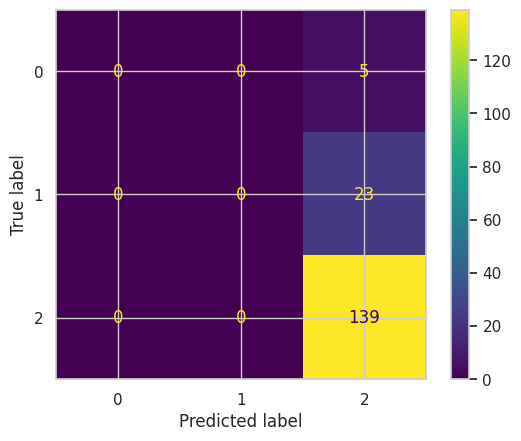

In [40]:
pred_gauss = grid_gauss.predict(X_test_standar)
print(classification_report(y_test, pred_gauss, zero_division=0))
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_gauss)).plot()

Si bien las metircas han mejorado debido a que el modelo se equivoca menos (ha acercado mas verdaderos positivos), seguimos teniendo el problema de que siempre clasifica la misma clase para cualquiera de las tres clases.

### Validacion Cruzada

Obtenemos las metricas en cada iteracion de la validacion cruzada, y un promedio de las mismas como metrica general del modelo.

In [41]:
# Separamos las características y la variable objetivo
X = pd.concat([X_train_standar, X_test_standar], axis=0)
y = pd.concat([y_train, y_test], axis=0)

# Creamos el modelo SVM
modelo_sub = svm.SVC(C=0.5, gamma=500, kernel="rbf", random_state=42, class_weight='balanced')

# Creamos el objeto de validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Listas para almacenar los resultados de cada iteración
precisiones = []
exhaustividades = []
exactitudes = []

# Bucle para realizar la validación cruzada
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Entrenamos el modelo
    modelo_sub.fit(X_train, y_train)

    # Realizamos las predicciones
    y_pred = modelo_sub.predict(X_test)

    # Calculamos las métricas y las añadimos a las listas
    precisiones.append(precision_score(y_test, y_pred, average='macro', zero_division=0))
    exhaustividades.append(recall_score(y_test, y_pred, average='macro', zero_division=0))
    exactitudes.append(accuracy_score(y_test, y_pred))

# Calculamos la media de las métricas
precision_media = np.mean(precisiones)
exhaustividad_media = np.mean(exhaustividades)
exactitud_media = np.mean(exactitudes)

print(f'Precisión media: {precision_media}')
print(f'Exhaustividad media: {exhaustividad_media}')
print(f'Exactitud media: {exactitud_media}')


Precisión media: 0.2718562874251497
Exhaustividad media: 0.3333333333333333
Exactitud media: 0.8155688622754491


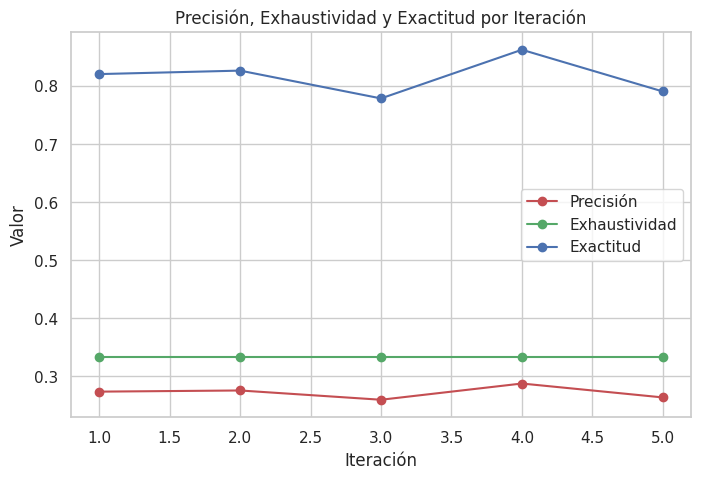

In [42]:
# Creamos el eje x para el gráfico
eje_x = range(1, len(precisiones) + 1)

plt.figure(figsize=(8, 5))

# Graficamos las precisiones
plt.plot(eje_x, precisiones, marker='o', linestyle='-', color='r', label='Precisión')

# Graficamos las exhaustividades
plt.plot(eje_x, exhaustividades, marker='o', linestyle='-', color='g', label='Exhaustividad')

# Graficamos las exactitudes
plt.plot(eje_x, exactitudes, marker='o', linestyle='-', color='b', label='Exactitud')

plt.xlabel('Iteración')
plt.ylabel('Valor')
plt.title('Precisión, Exhaustividad y Exactitud por Iteración')
plt.legend()

plt.show()

En este caso notamos conjuntos mas parejos que resultan en entrenamientos mas similares entre si ante el mismo modelo.

### Visualizacion de clasificacion

Es solo un ejemplo de visualizacion de como clasifica este nuevo modelo con dos variables explicativas.

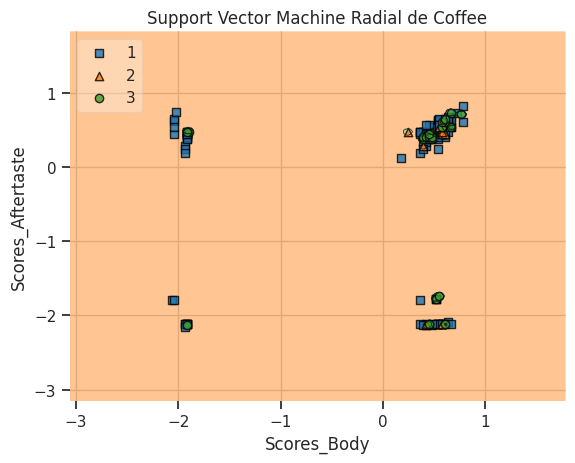

In [75]:
modelo_sub_lin = svm.SVC(C=0.5, gamma=500, kernel="rbf", random_state=42, class_weight='balanced')
X_test_subset = X_test[['Scores_Body', 'Scores_Aftertaste']]

# convercion a arrays numericos
class_mapping = {'Green': 1, 'Blue-Green': 2, 'Bluish-Green': 3}
y_test_encoded = y_test.map(class_mapping).values
X_test_subset_np = X_test_subset.values

# Ajusta el modelo con el subconjunto de datos
modelo_sub_lin.fit(X_test_subset_np, y_test_encoded)

# plor rediones de descion y valores
plot_decision_regions(X_test_subset_np, y_test_encoded, clf=modelo_sub_lin, legend=2)

plt.xlabel(X_test_subset.columns[0])
plt.ylabel(X_test_subset.columns[1])
plt.title('Support Vector Machine Radial de Coffee Test')
plt.show()

Nuevamente notamos el como arma los limites de decicion, y notamos que siempre predice la misma clase a pesar de haber mas de una clase en el conjunto de validacion. Aunque tambien es posible que no podamos visualizar complemente la clasificacion debido a limitacion de visibiidad.

## **Cuarto ejercicio**

---

Realizar la predicción del atributo Color utilizando Random Forest analizando los
parámetros cantidad de estimadores y la máxima profundidad de los árboles. Mostar los
resultados sobre los conjuntos de test (Precisión, Exhaustividad y Exactitud) utilizando
validación cruzada con k =5.

---

### Hiperparametrizacion


Probamos un nuevo algoritmo de clasificacion basado en arboles que no se ve afectado por la presencia de valores atipicos ni desbalanceos, por lo que no es necesario parametrizar ni transformar los datos en este caso.

Se hace una seleccion automatica de los mejores hiperparametros mediante una tecnica de GridSeachCV.

In [68]:
rscv = GridSearchCV(
        estimator = RandomForestClassifier(random_state=123),
        param_grid={
            "n_estimators": [1, 2, 3, 5, 10, 20],
            "max_depth": [1, 2, 3, 5, 10, 20]},
        scoring="accuracy",
        n_jobs=3,
        cv=5,
        return_train_score=True,
    )

rscv.fit(X_train_standar, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123), n_jobs=3,
             param_grid={'max_depth': [1, 2, 3, 5, 10, 20],
                         'n_estimators': [1, 2, 3, 5, 10, 20]},
             return_train_score=True, scoring='accuracy')

In [69]:
rscv.best_params_

{'max_depth': 1, 'n_estimators': 2}

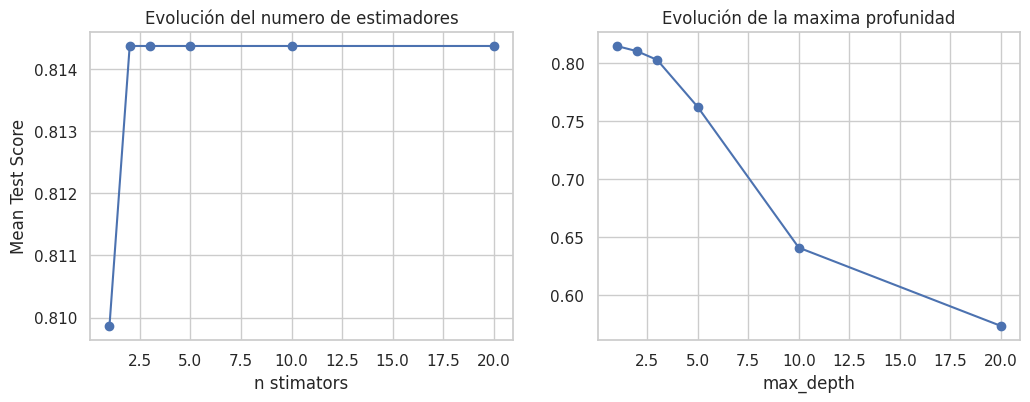

In [70]:
results = pd.DataFrame(rscv.cv_results_)
results_stimators = results[results.param_max_depth == 1]
results_depth = results[results.param_n_estimators == 2]

# Filtra los resultados para obtener solo la información relevante
param_stimators_values = results_stimators['param_n_estimators'].astype(float)
mean_test_scores_stimators = results_stimators['mean_test_score']

# Filtra los resultados para obtener solo la información relevante
param_depth_values = results_depth['param_max_depth'].astype(float)
mean_test_scores_depth = results_depth['mean_test_score']

# Crea el gráfico
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Gráfico para el parámetro n_stimators
axes[0].plot(param_stimators_values, mean_test_scores_stimators, marker='o')
axes[0].set_xlabel('n stimators')
axes[0].set_ylabel('Mean Test Score')
axes[0].set_title('Evolución del numero de estimadores')

# Gráfico para el parámetro max_depth
axes[1].plot(param_depth_values, mean_test_scores_depth, marker='o')
axes[1].set_xlabel('max_depth')
axes[1].set_title('Evolución de la maxima profunidad')

# Muestra el gráfico
plt.show()

Notamos que el numero de estimadores se estabiliza rapidamente para un valor relativamente bajo. Para la maxima profunidad notamos que decrecen rapidamente las metricas, que los valores mas bajos son los mas optimos.

Esto significa que para este problema el algoritmo es mas efectivo cuando toma desiciones cortas y rapidas, en lugar de expandir arboles en profudidad para determinar a que clase pertence un valor.

### Seleccion


              precision    recall  f1-score   support

  Blue-Green       0.00      0.00      0.00         9
Bluish-Green       0.00      0.00      0.00        21
       Green       0.82      1.00      0.90       137

    accuracy                           0.82       167
   macro avg       0.27      0.33      0.30       167
weighted avg       0.67      0.82      0.74       167



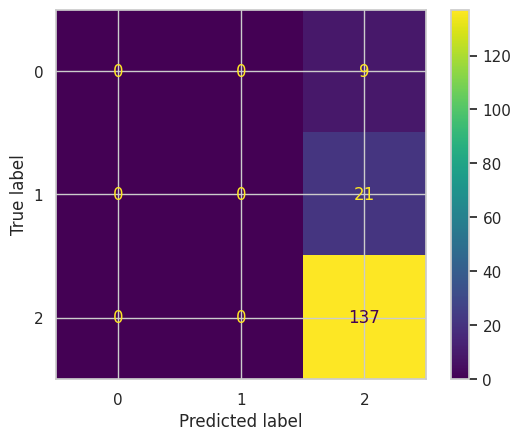

In [71]:
pred_rfc = rscv.predict(X_test_standar)
print(classification_report(y_test, pred_rfc, zero_division=0))
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_rfc)).plot()

Notamos un rendimiento levemente peor que con los metodos anteriores debido a que ahora predice menos verdaderos positivos.

### Validacion Cruzada

Notamos que la evolucion de las metricas de validacion en los conjuntos de validacion cruzada tambien son las mismas.

In [73]:
# Separamos las características y la variable objetivo
X = pd.concat([X_train_standar, X_test_standar], axis=0)
y = pd.concat([y_train, y_test], axis=0)

# Creamos el modelo SVM
modelo_sub = RandomForestClassifier(n_estimators=3, max_depth=1)

# Creamos el objeto de validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Listas para almacenar los resultados de cada iteración
precisiones = []
exhaustividades = []
exactitudes = []

# Bucle para realizar la validación cruzada
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Entrenamos el modelo
    modelo_sub.fit(X_train, y_train)

    # Realizamos las predicciones
    y_pred = modelo_sub.predict(X_test)

    # Calculamos las métricas y las añadimos a las listas
    precisiones.append(precision_score(y_test, y_pred, average='macro', zero_division=0))
    exhaustividades.append(recall_score(y_test, y_pred, average='macro', zero_division=0))
    exactitudes.append(accuracy_score(y_test, y_pred))

# Calculamos la media de las métricas
precision_media = np.mean(precisiones)
exhaustividad_media = np.mean(exhaustividades)
exactitud_media = np.mean(exactitudes)

print(f'Precisión media: {precision_media}')
print(f'Exhaustividad media: {exhaustividad_media}')
print(f'Exactitud media: {exactitud_media}')


Precisión media: 0.27185628742514967
Exhaustividad media: 0.3333333333333333
Exactitud media: 0.8155688622754491


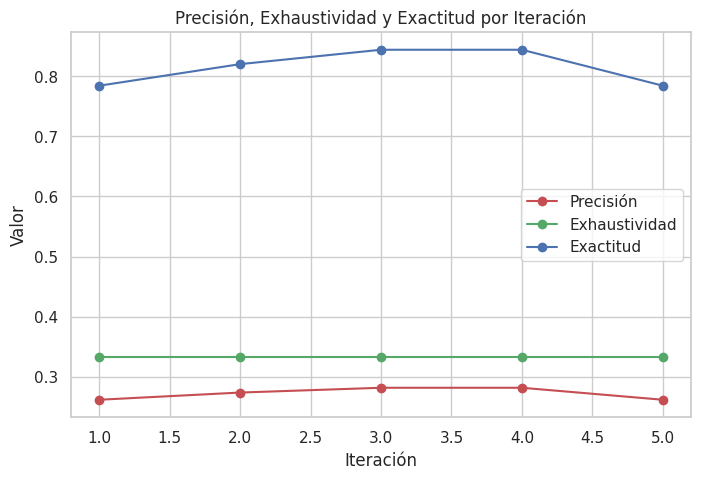

In [74]:
# Creamos el eje x para el gráfico
eje_x = range(1, len(precisiones) + 1)

plt.figure(figsize=(8, 5))

# Graficamos las precisiones
plt.plot(eje_x, precisiones, marker='o', linestyle='-', color='r', label='Precisión')

# Graficamos las exhaustividades
plt.plot(eje_x, exhaustividades, marker='o', linestyle='-', color='g', label='Exhaustividad')

# Graficamos las exactitudes
plt.plot(eje_x, exactitudes, marker='o', linestyle='-', color='b', label='Exactitud')

plt.xlabel('Iteración')
plt.ylabel('Valor')
plt.title('Precisión, Exhaustividad y Exactitud por Iteración')
plt.legend()

plt.show()

Nuevamente notamos entrenamientos parejos para la validacion cruzada, por lo que la distribucion de los conjuntos no parece ser causa de un mal desempeño en si mismos.

### Visualizacion de clasificacion


Nuevamente visualizamos solo con dos dimenciones de los datos como trabaja la clasificacion este algoritmo de bosques de decision, y notamos cierta diferencia con el metodo anterior.

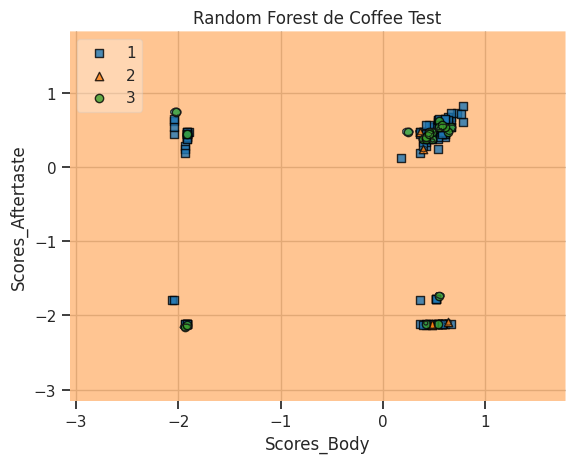

In [72]:
modelo_sub_tree = RandomForestClassifier(n_estimators= 3, max_depth=1)
X_test_subset = X_test[['Scores_Body', 'Scores_Aftertaste']]

# convercion a arrays numericos
class_mapping = {'Green': 1, 'Blue-Green': 2, 'Bluish-Green': 3}
y_test_encoded = y_test.map(class_mapping).values
X_test_subset_np = X_test_subset.values

# Ajusta el modelo con el subconjunto de datos
modelo_sub_lin.fit(X_test_subset_np, y_test_encoded)

# plor rediones de descion y valores
plot_decision_regions(X_test_subset_np, y_test_encoded, clf=modelo_sub_lin, legend=2)

plt.xlabel(X_test_subset.columns[0])
plt.ylabel(X_test_subset.columns[1])
plt.title('Random Forest de Coffee Test')
plt.show()

Obtenemos las mismas conclusiones que en los metodos anteriores, nuevamente ocurre que siempre predice la misma clase.

# ***Conclusiones***

Los diferentes métodos de clasificación tanto los basados en máquinas de soporte vectorial como los basados en árboles de decisión han demostrado un rendimiento no tan excelente para el conjunto de datos de entrada, debido principalmente al gran desbalance que poseen las clases.

Pero en general, pudimos notar un mejor rendimiento en el segundo modelo (Support Vector Machine Gaussiano) en que ha acertado su mayoría las predicciones de verdaderos positivos a pesar de sus predicciones de falses positivos. Por lo que resulta en un modelo sesgado.

Si tuviéramos que escoger un modelo de los tres propuestos para esta tarea específica con estos datos, sería este modelo debido a que su rendimiento es levemente superior a los otros dos enfoques.
